# Projeto Aplicado 1 - Classificador

**Docentes:** Leonardo Tomazeli Duarte e Cristiano Torezzan

**Disciplina:** Sistemas de Apoio à Decisão e Aprendizado de Máquina (LE610)

**Discentes**:

+ Augusto Chebel Machado				      RA.: 231762

+ João Pedro Marretto Helmeister			RA.: 174564

+ Nathan Czelusniak de Siqueira 			RA.: 186041

+ Vinícius Consentino Muniz			     	RA.: 245271

---

# Importando as bibliotecas

In [ ]:
# Importando pacotes:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from matplotlib import animation
from IPython.display import HTML
from base64 import b64encode

# Instalando bibliotecas: gspread para importar os dados do Google Sheets:
!pip install gspread

# Código que importa dados do Google Sheets:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Ideia Inicial

Classificação linear para determinar se um clube, recém ascendido à Série A do Campeonato Brasileiro, permanece ou não na elite do futebol brasileiro no ano seguinte ao acesso.

---


Em razão da curiosidade do grupo em entender padrões relativos aos clubes que "sobem" da Série B do Campeonato Brasileiro rumo à série A e logo no ano seguinte já retornam à segunda divisão, procurou-se elaborar um classificador capaz de atender essa questão.

Antes de tudo, dedica-se um espaço da apresentação da temática para aqueles que não são muito familiarizados com o mundo do futebol, explicando a forma de ingresso à divisão de elite do campeonato. Assim, dentro da competição nacional de futebol com 20 times participantes e 38 rodadas a serem disputadas entre eles, aqueles que conseguirem posicionar-se entre os 4 primeiros, conseguem o acesso. Vale ressaltar que essa competição é regulamentada na forma de 'pontos corridos', ou seja, pelo acúmulo de pontos ao longo do torneio, de maneira que a cada triunfo o time soma 3 pontos para si, a cada empate 1 ponto e, ao perder, o time não soma pontos à sua classificação. Assim, os 4 melhores times da Série B são classificados a jogar a Série A, enquanto os 4 piores da Série A, são rebaixados à Série B.

Desse modo, o grupo propôs a criação de um classificador linear a partir de três atributos assinalados abaixo a fim de prever quais times seriam rebaixados logo após o acesso a série A:


- Quantidade de Torcedores;
- Quantidade de Pontos somados durante a disputa pela Série B;
- Investimento financeiro realizado no ano seguinte ao acesso.

---



In [ ]:
# acessando a base de dados:
worksheet_ioio = gc.open('LE610 - Dados - Classificador Rebaixamento').sheet1
df_ioio = pd.DataFrame(worksheet_ioio.get_all_records())

# Mostra a planilha os primeiros elementos da planilha (nome+valores) para o problema dos times que sobem e depois descem da série A do Brasileirão:
df_ioio.head().style

,Times (ano),Região,Torcida (milhões),Pontuação Série B,Classificação na Série B,Rótulo,Investimento na Série A
0,América de Natal 2006,Nordeste,0.080000,61,4,-1,38
1,América Mineiro 2010,Sudeste,0.850000,63,4,-1,142
2,América Mineiro 2015,Sudeste,0.850000,65,4,-1,631
3,América Mineiro 2017,Sudeste,0.850000,73,1,-1,573
4,América Mineiro 2020,Sudeste,0.850000,73,2,1,297


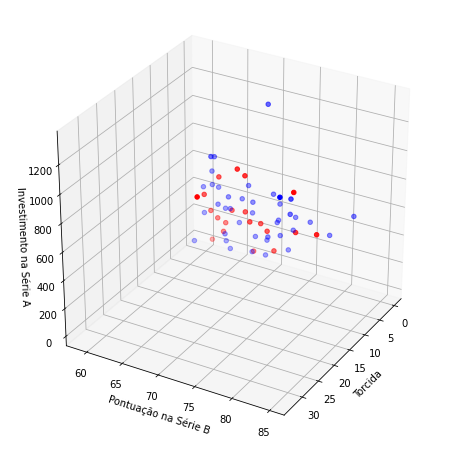

In [ ]:
# renomeando as colunas:
df_ioio.columns = ['Time', 'Região', 't', 'p', 'c', 'd', 'i']

# Plotando a distribuição de pontos para análise sobre os times recém-promovidos.
x1_C1 = []
x1_C2 = []
x2_C1 = []
x2_C2 = []
x3_C1 = []
x3_C2 = []
d_C1 = []
d_C2 = []
for i in range(0, len(df_ioio)):
  if df_ioio.iloc[i]['d'] == 1:
    x1_C1.append(df_ioio.iloc[i]['t'])
    x2_C1.append(df_ioio.iloc[i]['p'])
    x3_C1.append(df_ioio.iloc[i]['i'])
  else:
    x1_C2.append(df_ioio.iloc[i]['t'])
    x2_C2.append(df_ioio.iloc[i]['p'])
    x3_C2.append(df_ioio.iloc[i]['i'])

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(x1_C1, x2_C1, x3_C1, color='blue')
ax.scatter3D(x1_C2, x2_C2, x3_C2, color='red')
ax.set_xlabel('Torcida')
ax.set_ylabel('Pontuação na Série B')
ax.set_zlabel('Investimento na Série A')
ax.view_init(30, 30)
plt.show()

In [ ]:
# criando uma animação para enxergar melhor os pontos
def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate,
                               frames=360, interval=20, blit=True)

# Save.
anim.save('Superficie_Potencial_V.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

mp4 = open('Superficie_Potencial_V.mp4','rb').read()
data_url = "data:Superficie_Potencial_V/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

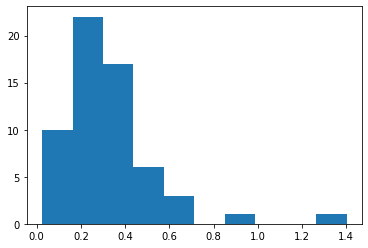

In [ ]:
# classificador linear - treinanento

clf_linear = LinearRegression()   # definindo um modelo linear

clf_linear.fit(df_ioio[['t', 'p', 'i']], df_ioio[['d']])        # treinamento do modelo

yhat = clf_linear.predict(df_ioio[['t', 'p', 'i']])   # calculando as saídas do modelo

plt.hist(yhat)                    # plotando o histograma dos resultados do treinamento

delta = 0.0                       # definindo o limiar de decisão delta
dhat = np.sign(yhat - delta)      # aplicando a regra de decisão para obter o rótulo estabelecido pelo classificado
                                    # sinal da expressão yhat - delta (regra de decisão yhat > 0: C1 // yhat < 0: C2)

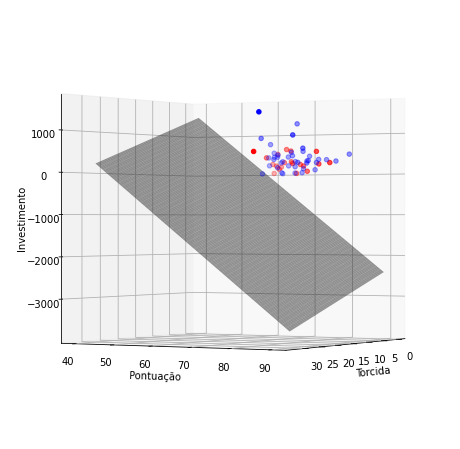

In [ ]:
# Plot do 3d
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection="3d")
ax.scatter3D(x1_C1, x2_C1, x3_C1, color='blue')
ax.scatter3D(x1_C2, x2_C2, x3_C2, color='red')
ax.set_xlabel('Torcida')
ax.set_ylabel('Pontuação')
ax.set_zlabel('Investimento')

# parâmetros da fronteira de decisão
w_LS3 = np.zeros(4)
w0 = w_LS3[0] = clf_linear.intercept_[0]
w1 = w_LS3[1] = clf_linear.coef_[0,0]
w2 = w_LS3[2] = clf_linear.coef_[0,1]
w3 = w_LS3[3] = clf_linear.coef_[0,2]

x1 = np.linspace(0,30,1000)
x2 = np.linspace(40,90,1000)

X,Y = np.meshgrid(x1,x2)
x3 = -(w0+w1*X+w2*Y)/w3

ax = fig.gca(projection='3d')

super = ax.plot_surface(X, Y, x3, color="grey", alpha=0.5)
ax.view_init(0, 30)

plt.show()

[[ 0 20]
 [ 0 40]]


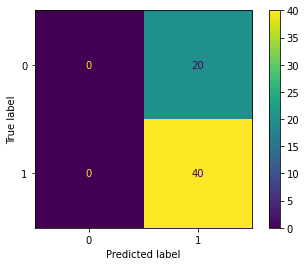

In [ ]:
# 1. Matriz de confusão

Conf_Matrix = confusion_matrix(df_ioio[['d']], dhat)   # obtendo a matriz de confusão

print(Conf_Matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix)
disp.plot()

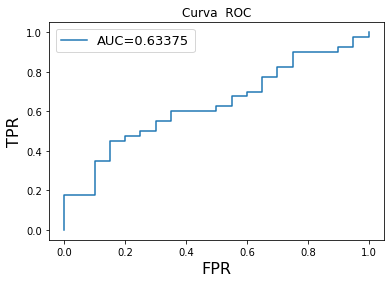

In [ ]:
# 2. Curva ROC

fpr, tpr, delta = roc_curve(df_ioio[['d']], yhat)

# plotando a curva ROC
auc=roc_auc_score(df_ioio[['d']], yhat)
plt.plot(fpr,tpr, label=f'AUC={auc}') # Calculando a área abaixo da curva roc
plt.title('Curva  ROC')
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.legend(fontsize=13)
plt.show()

In [ ]:
# 3. Acurácia
soma = 0
tn_tp = 0
for i in range (len(Conf_Matrix)):
  for j in range (len(Conf_Matrix)):
    soma = soma + Conf_Matrix[i][j]
    if i == j:
      tn_tp = tn_tp + Conf_Matrix[i][j]

acc = tn_tp / soma
print(f'Acurácia do modelo: {acc*100}%.')

Acurácia do modelo: 66.66666666666666%.


Percebe-se que o classificador não atende às expectativas de maneira eficiente, em virtude, especialmente, dos atributos escolhidos para sua criação.

Neste sentido, apesar de as peculiaridades escolhidas fazerem parte do universo futebolístico e poderem ser relativamente importantes nesse tema, para a finalidade da criação do classificador linear, elas não são pertinentes para discriminar os clubes em duas regiões bem definidas no espaço, sendo a primeira de clubes que permanecem na série A e a segunda dos que são rebaixados.

Além do mais, a presença de alguns outliers nos dados, como por exemplo os clubes Corinthians e Palmeiras, os quais destoam muitos das demais equipes sobretudo na questão financeira e de torcida prejudicaram um bom ajuste de uma fronteira de decisão. Assim, o classificador na verdade não classificou nenhum dado, como visto na Matriz de Confusão, simplesmente atribuindo todos os dados à mesma classe, o que explica a acurácia de 66%, já que a proporção vista na base de dados era justamente 2/3 dos times sobem e permancem enquanto 1/3 sobe e cai.

Complementando, os atributos escolhidos não demonstraram ser suficientes e qualitativos o bastante para realizar essa classificação, proporcionando resultados não satisfatórios, como a visualização da Curva ROC mais próxima do comportamento típico da aleatoriedade em relação a um comportamento de um classificador de qualidade. Além disso, a área abaixo da curva roc é de 0.634, o que é outra métrica ruim para o classificador.

Esse fato pode ser observado porque se pararmos para analisar a questão da pontuação conquistada durante a série B como fator de influência na disputa da Série A, realmente não é algo factível e conexo, uma vez que as competições, exigências, níveis técnicos envolvidos, etc, são bem diferentes. Assim, pode-se visualizar que o time na série B pode acabar com uma pontuação recorde, contudo, não será um fator relevante quando este for disputar a divisão de elite.

Além disso, a questão investimento não é um fator discrepante entre os times, uma vez que os elencos que participam desta edição, em sua grande maioria, possuem capacidades financeiras semelhantes e aportes financeiros na montagem dos elencos relativamente próximos. Logo, não é um fator capaz de segregá-los de maneira clara e precisa.

---

# Nova abordagem (definitiva)

Classificação linear aplicada na predição da classificação dos clubes, do cenário nacional, para a Copa Libertadores da América (G4).

---

A escolha pelo tema deu-se pelo aspecto em comum no grupo, a paixão pelo futebol. Deste modo, a partir de uma frequência elevada de visualizações de diversos jogos, surgiu-se o questionamento sobre quais os fatores, dentre os diversos existentes nesse meio, são os que mais influenciam um time de futebol rumo à classificação para a tão desejada competição continental.

Assim, o grupo propôs a criação de um classificador linear que fosse capaz de prever se um clube se classificaria ou não para a Libertadores a partir de três atibutos escolhidos. Ademais, é possível ilustrar a relevância destas métricas, que circundam o mundo do futebol, para o cumprimento do objetivo.

A saber, os atributos escolhidos foram:

- Valor de Mercado Médio;
- Saldo de Gols (Gols Pró - Gols Contra);
- Média de Público.

Para a elaboração dos códigos e, consequentes, do classificadores lineares, foi necessário buscar dados e referências em sites especializados no assunto, no caso, optou-se pela busca das informações necessárias dentro dos sites Data Folha e Transfermarket.

O primeiro, foi responsável por fornecer dados relativos à quantidade de torcedores associados à cada time, contudo, vale menção que essas pesquisas são efetuadas com foco em apenas alguns times, deixando outros, dentre os quais a grande maioria está relacionada à esse projeto, em segundo plano. Assim, para esses casos, procurou-se em outros sites com atualização não tão frequente ou em outros meios de comunicação menos expressivos essas informações.

Já a plataforma Transfermarket foi a mais utilizada dentro dos projetos elaborados, a qual foi responsável pela coleta do histórico das competições dos times escolhidos, da média de público de cada time por ano e dos valores médios de mercados dos respectivos elencos.

Através deles, coletou-se os dados de maneira manual e os alocou dentro de uma planilha. Para uma melhor compatibilidade e facilidade com o Google Colaboratory, os dados foram colocados no Google Sheets, a qual podem ser encontrados no seguinte link:

https://docs.google.com/spreadsheets/d/1QE7fBf4j8TzXv5SKybN9yVlvRzKsBp_lzbqE5cdLYKk/edit#gid=0

Na planilha elaborada, foi criada uma coluna para cada atributo escolhido para análise. Vale ressaltar a coluna Rótulo, a qual é composta por elementos +1 e -1, atribui (+1) para os times que terminaram a competição no G4, e (-1) para os que não conseguiram a classificação direta à Libertadores.

Inicialmente, a ideia foi coletar todos os dados, de ambos os temas, dentro do período o qual o formato de 'pontos corridos' fosse praticado, ou seja, a partir de 2006 até os dias atuais. Contudo, ao analisar o período 2010 - 2021, aproximadamente 240 dados foram coletados, os quais foram considerados pelo grupo suficientes para a análise desejada, ou seja, perceber se com os atributos escolhidos é possível obter-se um bom classificador.

Em seguida, elaborou-se um código na linguagem de programação *python* a fim de se obter, com o auxílio das bibliotecas *numpy*, *pandas*, *sklearn* e *matplotlib*, um classificador linear que atenda a nossa demanda inicial. Neste sentido, o código comentado passo-a-passo bem como todos os gráficos e tabelas que nos auxiliaram na compreensão do problema seguem abaixo.

In [ ]:
# acessando a base de dados
worksheet_G4 = gc.open('LE610 - Dados - Classificador G4').sheet1
df_G4 = pd.DataFrame(worksheet_G4.get_all_records())

# Mostra a planilha com os dados completos (nome+valores) para o problema dos times que se classificam para a Libertadores:
df_G4.head().style

,Ano,Time,Valor de mercado médio,Gols Pró,Gols Contra,Saldo,Rótulo,Média de público
0,2021,Atlético MG,2220,67,34,33,1,42300
1,,Flamengo,2990,69,36,33,1,21904
2,,Palmeiras,1910,58,43,15,1,15882
3,,Fortaleza,678,44,45,-1,1,19590
4,,Corinthians,2650,40,36,4,-1,32791


In [ ]:
# renomeando as colunas
df_G4.columns = ['Ano', 'Time', 'v', 'gp', 'gc', 's', 'd', 'm']

+  **Criação de listas, relativas aos dados, de acordo com os rótulos estabelecidos:**

+ **Legenda:**

- x1_C1 = Caso o Rótulo seja 1, para o Atributo 1, o dado é direcionado para a lista.
- x1_C2 = Caso o Rótulo seja -1, para o Atributo 1, o dado é direcionado para a lista.
- x2_C1 = Caso o Rótulo seja 1, para o Atributo 2, o dado é direcionado para a lista.
- x2_C2 = Caso o Rótulo seja -1, para o Atributo 2, o dado é direcionado para a lista.
- x3_C1 = Caso o Rótulo seja 1, para o Atributo 3, o dado é direcionado para a lista.
- x3_C2 = Caso o Rótulo seja -1, para o Atributo 3, o dado é direcionado para a lista.





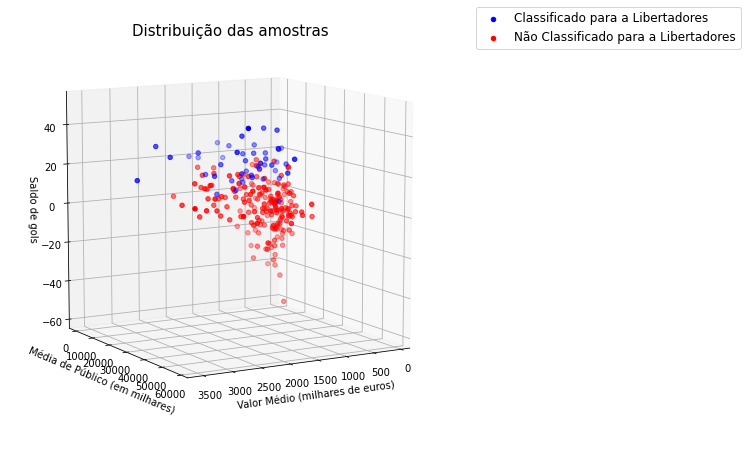

In [ ]:
# Plotando a distribuição de pontos para análise sobre o G4:
x1_C1 = []
x1_C2 = []
x2_C1 = []
x2_C2 = []
x3_C1 = []
x3_C2 = []

for i in range(0, len(df_G4)):
  if df_G4.iloc[i]['d'] == 1:
    x1_C1.append(df_G4.iloc[i]['v'])
    x2_C1.append(df_G4.iloc[i]['m'])
    x3_C1.append(df_G4.iloc[i]['s'])
  else:
    x1_C2.append(df_G4.iloc[i]['v'])
    x2_C2.append(df_G4.iloc[i]['m'])
    x3_C2.append(df_G4.iloc[i]['s'])

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(x1_C1, x2_C1, x3_C1, color='blue',label="Classificado para a Libertadores")
ax.scatter3D(x1_C2, x2_C2, x3_C2, color='red',label="Não Classificado para a Libertadores")
ax.set_xlabel('Valor Médio (milhares de euros)')
ax.set_ylabel('Média de Público (em milhares)')
ax.set_zlabel('Saldo de gols')
ax.set_title('Distribuição das amostras', fontsize=15)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0, fontsize=12)
ax.view_init(10, 60)
plt.show()

In [ ]:
# criando uma animação para visualizar os dados
def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate,
                               frames=360, interval=20, blit=True)

# Save:
anim.save('Superficie_Potencial_V.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

mp4 = open('Superficie_Potencial_V.mp4','rb').read()
data_url = "data:Superficie_Potencial_V/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

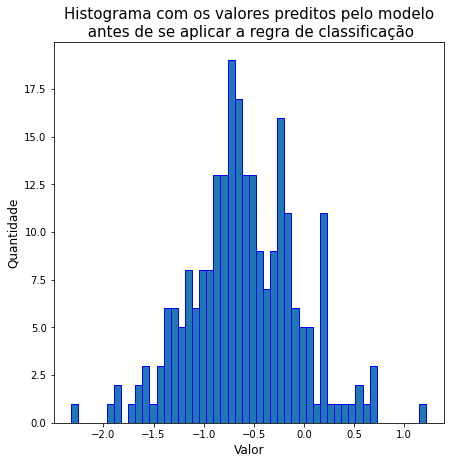

In [ ]:
# Classificador Linear - treinanento:

clf_linear = LinearRegression()   # Definindo um modelo linear

clf_linear.fit(df_G4[['v', 'm', 's']], df_G4[['d']])        # Treinamento do modelo

yhat = clf_linear.predict(df_G4[['v', 'm', 's']])   # Calculando as saídas do modelo
plt.figure(figsize=[7,7])
plt.title("Histograma com os valores preditos pelo modelo\n antes de se aplicar a regra de classificação",fontsize=15)
plt.xlabel("Valor",fontsize=12)
plt.ylabel("Quantidade",fontsize=12)
plt.hist(yhat,bins=50,edgecolor="b")                    # Plotando o histograma dos resultados do treinamento

delta = 0.0                         # Definindo o limiar de decisão delta
dhat = np.sign(yhat - delta)        # Aplicando a regra de decisão para obter o rótulo estabelecido pelo classificado
                                    # Sinal da expressão yhat - delta (regra de decisão yhat > 0: C1 // yhat < 0: C2)

+ **Definição dos parâmetros que definem a Fronteira de Decisão**

+ **Plotagem do gráfico 3D, com a colocação dos dados associados em conjunto com a Fronteira de Decisão estabelecida e devidamente calculada.**

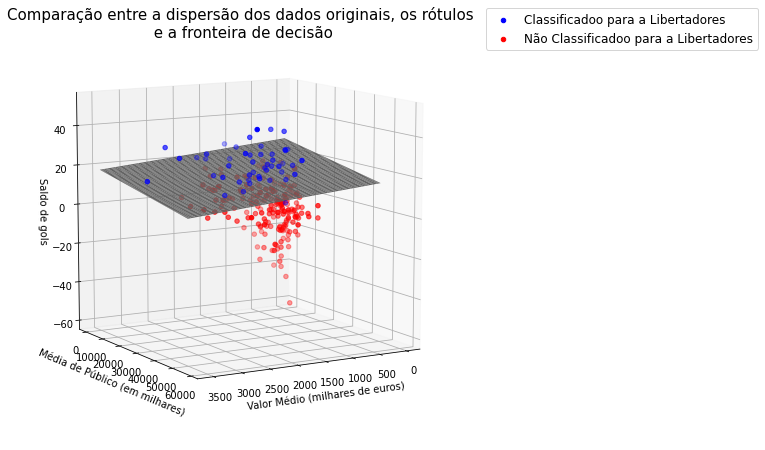

In [ ]:
# Plot do 3d dos dados originais e a fronteira de decisão:
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection="3d")
ax.scatter3D(x1_C1, x2_C1, x3_C1, color='blue',label="Classificadoo para a Libertadores")
ax.scatter3D(x1_C2, x2_C2, x3_C2, color='red',label="Não Classificadoo para a Libertadores")
ax.set_xlabel('Valor Médio (milhares de euros)')
ax.set_ylabel('Média de Público (em milhares)')
ax.set_zlabel('Saldo de gols')

plt.title("Comparação entre a dispersão dos dados originais, os rótulos\n e a fronteira de decisão",fontsize=15)

# Parâmetros da fronteira de decisão:
w_LS3 = np.zeros(4)
w0 = w_LS3[0] = clf_linear.intercept_[0]
w1 = w_LS3[1] = clf_linear.coef_[0,0]
w2 = w_LS3[2] = clf_linear.coef_[0,1]
w3 = w_LS3[3] = clf_linear.coef_[0,2]

# Criação de uma grade de pontos no eixo x e y para se "plotar" o plano(fronteira) de classificação a partir dos parâmetros w0, w1, w2, w3 obtidos.
x1 = np.linspace(0,3500,1000)
x2 = np.linspace(0,50000,1000)

X,Y = np.meshgrid(x1,x2)
x3 = -(w0+w1*X+w2*Y)/w3 # Ao considerar delta igual a zero, podemos elaborar essa equação para plotar a fronteira de decisão que é um plano.

ax = fig.gca(projection='3d')

plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0, fontsize=12)


super = ax.plot_surface(X, Y, x3, color="grey", alpha=1)
ax.view_init(10, 60)

plt.show()

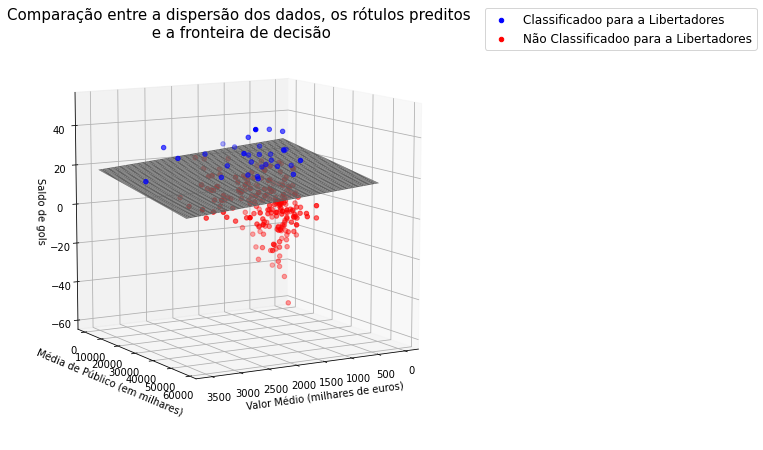

In [ ]:
# Plot do 3d e dos dados rotulados:
x1_C1 = []
x1_C2 = []
x2_C1 = []
x2_C2 = []
x3_C1 = []
x3_C2 = []

for i in range(0, len(df_G4)):
  if dhat[i][0]== 1:
    x1_C1.append(df_G4.iloc[i]['v'])
    x2_C1.append(df_G4.iloc[i]['m'])
    x3_C1.append(df_G4.iloc[i]['s'])
  else:
    x1_C2.append(df_G4.iloc[i]['v'])
    x2_C2.append(df_G4.iloc[i]['m'])
    x3_C2.append(df_G4.iloc[i]['s'])

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection="3d")

ax.scatter3D(x1_C1, x2_C1, x3_C1, color='blue',label="Classificadoo para a Libertadores")
ax.scatter3D(x1_C2, x2_C2, x3_C2, color='red',label="Não Classificadoo para a Libertadores")
ax.set_xlabel('Valor Médio (milhares de euros)')
ax.set_ylabel('Média de Público (em milhares)')
ax.set_zlabel('Saldo de gols')
plt.title("Comparação entre a dispersão dos dados, os rótulos preditos\n e a fronteira de decisão",fontsize=15)

# Parâmetros da fronteira de decisão:
w_LS3 = np.zeros(4)
w0 = w_LS3[0] = clf_linear.intercept_[0]
w1 = w_LS3[1] = clf_linear.coef_[0,0]
w2 = w_LS3[2] = clf_linear.coef_[0,1]
w3 = w_LS3[3] = clf_linear.coef_[0,2]

# Criação de uma grade de pontos no eixo x e y para se "plotar" o plano(fronteira) de classificação a partir dos parâmetros w0, w1, w2, w3 obtidos.
x1 = np.linspace(0,3500,1000)
x2 = np.linspace(0,50000,1000)

X,Y = np.meshgrid(x1,x2)
x3 = -(w0+w1*X+w2*Y)/w3 # Ao considerar delta igual a zero, podemos elaborar essa equação para plotar a fronteira de decisão que é um plano.

ax = fig.gca(projection='3d')

plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0, fontsize=12)

super = ax.plot_surface(X, Y, x3, color="grey", alpha=1)
ax.view_init(10, 60)

plt.show()

 + **A partir dos dados definidos, treinamentos realizados, cálculo da fronteira de decisão e plotagem da realidade em um gráfico 3D, fez-se necessário o cálculo da *Matriz de Confusão*, *Curva ROC* e *Acurácia*, com a intenção de uma representação mais visual do desempenho do classificador elaborado.**


[[191   1]
 [ 18  30]]


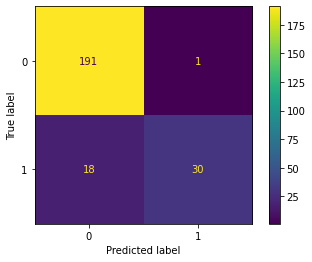

In [ ]:
# 1. Matriz de confusão:

Conf_Matrix = confusion_matrix(df_G4[['d']], dhat)   # Obtendo a matriz de confusão

print(Conf_Matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix)
disp.plot()

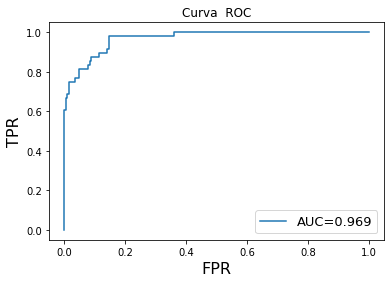

In [ ]:
# 2. Curva ROC:

fpr, tpr, delta = roc_curve(df_G4[['d']], yhat)

# Plotando a curva ROC
auc=round(roc_auc_score(df_G4[['d']], yhat),3) # Calculando a área abaixo da curva roc
plt.plot(fpr,tpr, label=f'AUC={auc}')
plt.title('Curva  ROC')
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.legend(fontsize=13)
plt.show()

In [ ]:
# 3. Acurácia:
soma = 0
tn_tp = 0
for i in range (len(Conf_Matrix)):
  for j in range (len(Conf_Matrix)):
    soma = soma + Conf_Matrix[i][j]
    if i == j:
      tn_tp = tn_tp + Conf_Matrix[i][j]

# Cálculo da Acurácia:
acc = tn_tp / soma
print(f'Acurácia do modelo: {acc*100}%.')

Acurácia do modelo: 92.08333333333333%.


Com as construções elaboradas, percebeu-se que os atributos estabelecidos foram utilizados de maneira a produzir um resultado extremamente satisfatório, mostrando acurácia de aproximadamente 92% e uma área abaixo da curva roq de 0,969.

Contudo, pode-se perceber, entre essas qualidades escolhidas, que o fator ‘saldo de gols’ é preponderante em relação aos outros dois, fazendo com que o classificador seja, de certa maneira, induzido a estabelecer um padrão de diferenciação entre as classes. Esse fato relatado pode ser facilmente explicado e entendido, uma vez que, conforme o saldo de gols de um time cresce, naturalmente o time tende a estar ganhando mais jogos e, assim, pontuando mais na competição e, portanto, aproximando-se cada vez mais do G4.

Frente a isso, o grupo propôs a criação de outro classificador, agora com apenas dois dos atributos: Valor Médio de Mercado e Quantidade Média de Torcedores no estádio durante o campeonato, de maneira a entender melhor a relevância da questão extra-campo no classificador, uma vez que o um bom desempenho dentro das quatro linhas credencia um time a brigar pela posições mais elevadas no campeonato.

 ---


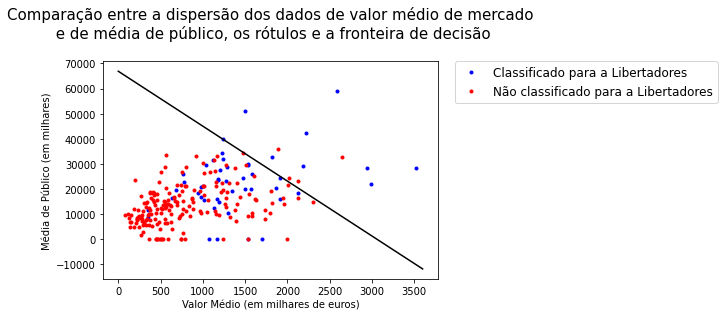


Acurácia do modelo: 82.08333333333333%.


In [ ]:
# classificador com 2 atributos e 1 saída
x1_C1 = []
x1_C2 = []
x2_C1 = []
x2_C2 = []
d_C1 = []
d_C2 = []
for i in range(0, len(df_G4)):
  if df_G4.iloc[i]['d'] == 1:
    x1_C1.append(df_G4.iloc[i]['v'])
    x2_C1.append(df_G4.iloc[i]['m'])
  else:
    x1_C2.append(df_G4.iloc[i]['v'])
    x2_C2.append(df_G4.iloc[i]['m'])

plt.title("Comparação entre a dispersão dos dados de valor médio de mercado\n e de média de público, os rótulos e a fronteira de decisão\n",fontsize=15)
plt.plot(x1_C1, x2_C1, '.b',label="Classificado para a Libertadores")
plt.plot(x1_C2, x2_C2, '.r',label="Não classificado para a Libertadores")
plt.xlabel("Valor Médio (em milhares de euros)")
plt.ylabel('Média de Público (em milhares)')
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0, fontsize=12)

# classificador linear - treinanemto

clf_linear = LinearRegression()   # Definindo um modelo linear.

clf_linear.fit(df_G4[['v', 'm']], df_G4[['d']])        # Treinamento do modelo.

yhat = clf_linear.predict(df_G4[['v', 'm']])   # Calculando as saídas do modelo.

#plt.hist(yhat)                    # Plotando o histograma dos resultados do treinamento.

delta = 0.0                       # Definindo o limiar de decisão delta.
dhat = np.sign(yhat - delta)      # Aplicando a regra de decisão para obter o rótulo estabelecido pelo classificado.
                                  # Sinal da expressão yhat - delta (regra de decisão yhat > 0: C1 // yhat < 0: C2).

w_LS = np.zeros(3)
w_LS[0] = clf_linear.intercept_[0]
w_LS[1] = clf_linear.coef_[0,0]
w_LS[2] = clf_linear.coef_[0,1]
x1_x = np.arange(0, 3600, 0.01)
x2_y = -w_LS[0]/w_LS[2] - (w_LS[1]/w_LS[2])*x1_x          # Fronteira de decisão.
plt.plot(x1_x, x2_y,'k')
plt.show()

Conf_Matrix = confusion_matrix(df_G4[['d']], dhat)   # Obtendo a matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix)
soma = 0
tn_tp = 0
for i in range (len(Conf_Matrix)):
  for j in range (len(Conf_Matrix)):
    soma = soma + Conf_Matrix[i][j]
    if i == j:
      tn_tp = tn_tp + Conf_Matrix[i][j]

# Cálculo da acurácia:
acc = tn_tp / soma
print()
print(f'Acurácia do modelo: {acc*100}%.')

[[188   4]
 [ 39   9]]


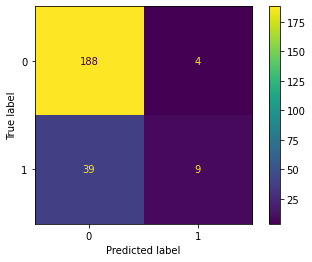

In [ ]:
# 1. Matriz de confusão:

Conf_Matrix = confusion_matrix(df_G4[['d']], dhat)   # Obtendo a matriz de confusão.

print(Conf_Matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix)
disp.plot()

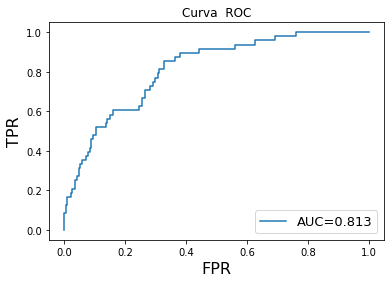

In [ ]:
# 2. Curva ROC:

fpr, tpr, delta = roc_curve(df_G4[['d']], yhat)

# Plotando a curva ROC
auc=round(roc_auc_score(df_G4[['d']], yhat),3) # Calculando a área abaixo da curva roc
plt.plot(fpr,tpr, label=f'AUC={auc}')
plt.title('Curva  ROC')
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.legend(fontsize=13,loc="lower right")
plt.show()

Com esse novo classificador, percebeu-se que uma junção entre maior média de público no estádio durante a temporada e maior valor médio de mercado do elenco, é capaz de propiciar uma outra compreensão do cenário de quem permanecerá entre os quatro melhores times do campeonato, classificando, assim, para a disputa da Libertadores. Neste sentido, apesar da acurácia calculada ser de aproximadamente 82% e a área abaixo da curva roq de 0,813 (métricas inferiores ao contexto que considerava o saldo de gols), consegue-se analisar uma relação interessante entre dois parâmetros que permeiam o ambiente extra-campo.

Neste sentido, ao analisar o contexto do futebol por trás desse resultado, nota-se que é algo factível, uma vez que conforme o apoio da torcida cresce, em relação aos números de público presente nos estádios, o time acaba sendo mais contagiado/animado na busca pelos objetivos, bem como quanto mais forte for o elenco, representado pelo valor de mercado mais alto, melhor tecnicamente será para a disputa das competições.

Ainda assim, a presença de alguns outliers como o Flamengo (que possui médias de público elevadas frente aos demais) e o Palmeiras, Corinthians, Atlético MG (com altos investimentos em certas temporadas), fazem com que o classificador se desloque em relação ao "centro de massa" das amostras, de forma a acertar muito mais aqueles times que não se classificaram à competição continental.

O classificador, portanto, apesar de apresentar um desempenho aparrentemente melhor, não pode ser considerado efetivo na predição objetivada. É possível concluir apenas que a pouca participação da torcida, aliada com um baixo investimento no elenco, tornam a missão de se classificar à Libertadores bastante complexa e improvável, ainda que existam pequenas exceções.

**Próximos Passos para melhorar o Classificador.**


A fim de se melhorar os resultados obtidos no classificador, elenca-se alguns próximos passos a serem estudados e implementados caso atendam o objetivo.

Em primeiro lugar, destaca-se a criação de um banco de dados que possua quantidades similares de dados pertencentes a cada classe, diferente da proporção 4:16 usada. Desse modo, é possível obter um classificador que aprenda melhor sobre os times que se classificam para a Libertadores.

Em segundo lugar, ressalta-se a adoção ou combinação de novos atributos que permeiam o meio futebolístico com o objetivo de se analisar o comportamento do classificador neste contexto. Neste sentido, um possível novo atributo pode ser a média móvel de alguns tópicos específicos, como a pontuação no campeonato. Dessa forma, a média móvel daria um grau da evolução de determinados clubes ao longo de um histórico recente, sendo possível perceber se há uma tendência de crescimento a cada campeonato.  

Tal ideia poderia ser usada para outros atributos também, como o próprio saldo, a média de público e o nível de investimento.

Seria possível, ademais, considerar também eliminar alguns pontos "outliers" da análise, que influenciam na fronteira determinada, ou utilizar um delta que contemple mais pontos, de acordo com o interesse.

Por fim, uma nova estratégia para validar a qualidade do classificador seria ampliar o banco de dados e aplicar uma estratégia holdout, de forma que os dados de treinamento sejam diferentes dos dados de teste. Por meio disso, seria possível estudar a qualidade do aprendizado do classificador, haja vista que ele rotularia dados com os quais ele não aprendeu.




**Link Apresentação:**


https://www.canva.com/design/DAFNc4dTSu0/7SePB_mwZHiugaApS3J9Ww/view?utm_content=DAFNc4dTSu0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton